In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Clean_Dataset.csv',index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [4]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Integer Mapping of stops

In [3]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [4]:
stops_mapping = {'zero': 0 , 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_mapping)


In [5]:
df['stops'].value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 27.5+ MB


In [8]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


Pre-processing




In [9]:
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

df['arrival_time'] = df['arrival_time'].map(time_mapping)
df['departure_time'] = df['departure_time'].map(time_mapping)


In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,Economy,2.33,1,5955


In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_airline = LabelEncoder()
le_class = LabelEncoder()
le_flight = LabelEncoder()

# Fit and transform the airline and class columns
df['airline'] = le_airline.fit_transform(df['airline'])
df['class'] = le_class.fit_transform(df['class'])
df['flight'] = le_class.fit_transform(df['flight'])



In [12]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,Delhi,3,0,4,Mumbai,1,2.17,1,5953
1,4,1387,Delhi,0,0,1,Mumbai,1,2.33,1,5953
2,0,1213,Delhi,0,0,0,Mumbai,1,2.17,1,5956
3,5,1559,Delhi,1,0,2,Mumbai,1,2.25,1,5955
4,5,1549,Delhi,1,0,1,Mumbai,1,2.33,1,5955


In [13]:
city_mapping = {
    'Delhi': 0,
    'Mumbai': 1,
    'Bangalore': 2,
    'Kolkata': 3,
    'Hyderabad': 4,
    'Chennai': 5
}

df['source_city'] = df['source_city'].map(city_mapping)
df['destination_city'] = df['destination_city'].map(city_mapping)


## Final Processed Dataset

In [14]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,0,3,0,4,1,1,2.17,1,5953
1,4,1387,0,0,0,1,1,1,2.33,1,5953
2,0,1213,0,0,0,0,1,1,2.17,1,5956
3,5,1559,0,1,0,2,1,1,2.25,1,5955
4,5,1549,0,1,0,1,1,1,2.33,1,5955


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(3), int64(7)
memory usage: 24.0 MB


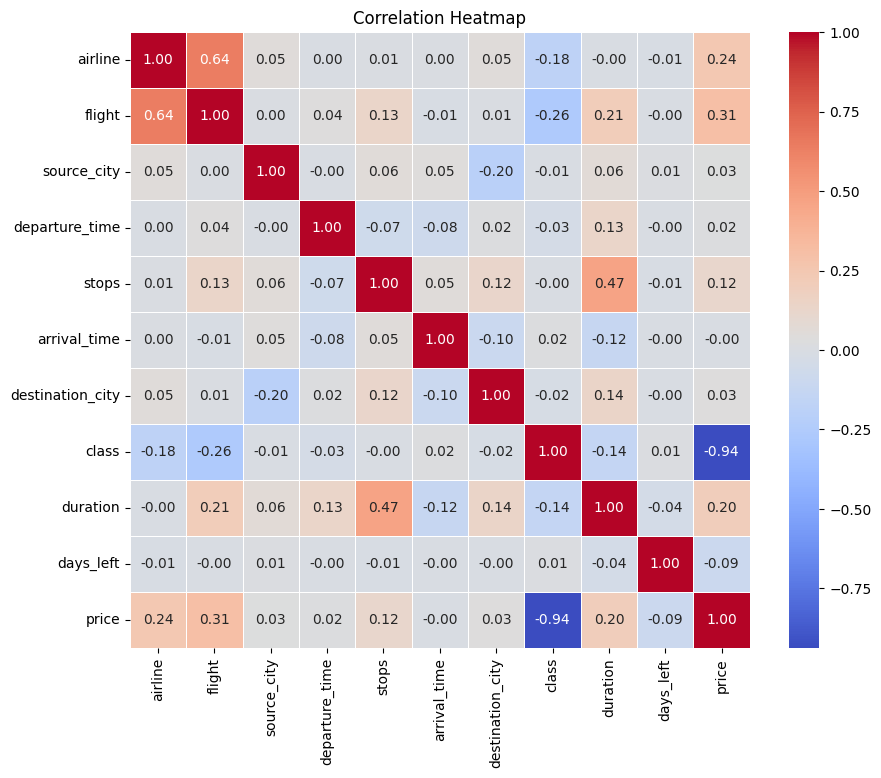

In [18]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


In [43]:
# storing the Dependent Variables in X and Independent Variable in Y
X=df.drop(['price'],axis=1)
y=df['price']

In [44]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [40]:
from sklearn.preprocessing import StandardScaler 

x_train = X_train  
x_test = X_test    

scaler = StandardScaler() 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [34]:
#RandomForest with scaled data
from sklearn.ensemble import RandomForestRegressor
rf_regressor_scaled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_scaled.fit(x_train_scaled, y_train)

y_pred = rf_regressor_scaled.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rf_r2_scaled = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2-score: {rf_r2_scaled}")

Mean Squared Error: 733506692.7201797
R2-score: -0.42520776125774873


In [35]:
X.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,0,3,0,4,1,1,2.17,1
1,4,1387,0,0,0,1,1,1,2.33,1
2,0,1213,0,0,0,0,1,1,2.17,1
3,5,1559,0,1,0,2,1,1,2.25,1
4,5,1549,0,1,0,1,1,1,2.33,1


In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [48]:
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# 5. Print results
print(f"Mean Squared Error: {mse}")
print(f"R2-score: {lr_r2}")

Mean Squared Error: 48157230.156861916
R2-score: 0.9064302222987104


In [49]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [50]:
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2-score: {rf_r2}")


Mean Squared Error: 5471880.385162119
R2-score: 0.9893681046526155


In [51]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R2-score: {dt_r2}")

Mean Squared Error: 8859011.072528362
R2-score: 0.9827868900680197


In [53]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [54]:
y_pred_knn = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

print(f"Mean Squared Error: {mse}")
print(f"R2-score: {knn_r2}")

Mean Squared Error: 275558093.400963
R2-score: 0.4645890251716366


In [55]:
#Bagging Regressor
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=base_estimator, n_estimators=300, random_state=42)
bagging_regressor.fit(X_train, y_train)

y_pred = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
br_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2-score: {br_r2}")

Mean Squared Error: 5447887.383248699
R2-score: 0.9894147231945896


In [56]:
#XGB
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2-score: {xgb_r2}")


Mean Squared Error: 12472841.080432197
R2-score: 0.9757651973878474


In [57]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2-score: {ridge_r2}")


Mean Squared Error: 48157201.75508232
R2-score: 0.906430277483533


In [58]:
#Lasso Regression
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2-score: {lasso_r2}")


Mean Squared Error: 48328075.808948964
R2-score: 0.9062468715473841


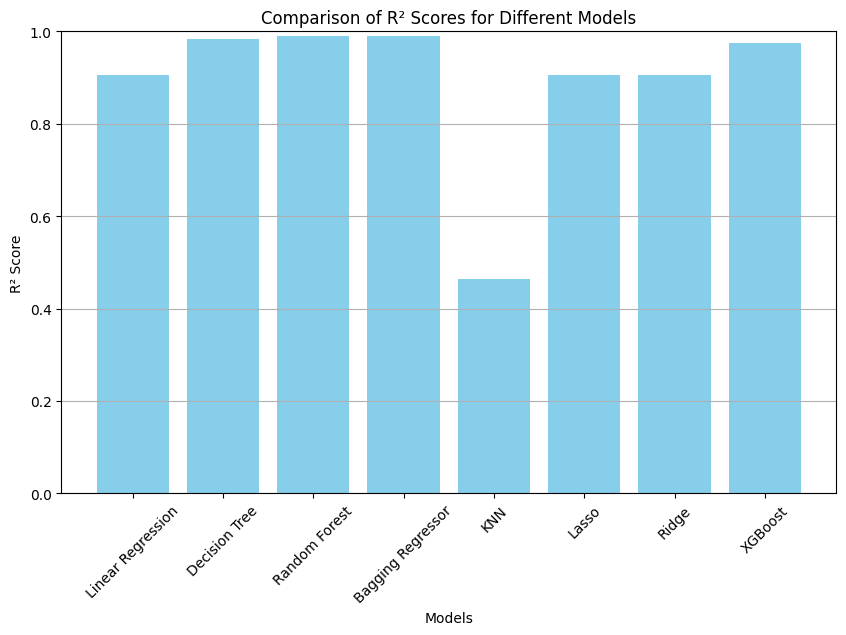

In [40]:
r2_scores = {
    'Linear Regression': lr_r2, 
    'Decision Tree': dt_r2,      
    'Random Forest': rf_r2,    
    'Bagging Regressor': br_r2,  
    'KNN': knn_r2,                
    'Lasso': lasso_r2,              
    'Ridge': ridge_r2,             
    'XGBoost': xgb_r2
}

# Plotting the bar chart
models = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='skyblue')  
plt.ylabel('R² Score')
plt.xlabel('Models')
plt.title('Comparison of R² Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y')  

# Display the plot
plt.show()
